# SVM

__Decission Boundary__
\begin{equation}
\text{Decision Boundary}: y = w*x + b = 0 
\end{equation}

__The Hyperplane H1 and H2__
\begin{equation}
\begin{aligned}
 w*x + b  \geq 1  \; \text{if} \: y_i = 1\\
 w*x + b  \leq -1 \; \text{if} \: y_i =-1
\end{aligned}
\end{equation}


__1. combining both equation of hyperplane in one__

\begin{equation}
 y_i(w*x + b)  \geq 1  \; \forall_i \in  \; \{1 \cdots n \}
\end{equation}


Margin
\begin{equation}
\text{Margin}: x_2 -x_1 \cdot \frac{w}{\lVert  w  \rVert} :=\frac{2}{\lVert  w  \rVert}
\end{equation}

Cost function for the determination of separting plane
\begin{equation}
\begin{aligned}
\text{h(w,b)} = \text{min}\frac{1}{2}\lVert  w  \rVert^2 \\
\text{with constraints} \: g_i(w,b)= y_i(w*x + b) \geq 1 := y_i(w*x + b) -1 \geq 0
\end{aligned}
\end{equation}


SVM Lagrange Problem

\begin{equation}
J(w,b) =\alpha \cdot \frac{1}{2}\lVert  w  \rVert^2 + \frac{1}{n}\sum_{i=1}^{n} max(0, [1 - y_i(w.x_i +b)])
\end{equation}

__2. cases__

\begin{equation}
\begin{aligned}
 \text{If}  \:  \:  y_i(w*x + b)  \geq 1, \text{then} \:  \:  \:  J(w,b) =\alpha \cdot \frac{1}{2}\lVert  w  \rVert^2  \\
 \text{else} \:  \:  J(w,b) =\alpha \cdot \frac{1}{2}\lVert  w  \rVert^2 +  [1 - y_i(w.x_i +b)]
\end{aligned}
\end{equation}

__case :1, partial derivative__
\begin{equation}
\begin{aligned}
\frac{\partial J}{\partial w}  =\alpha   w_k  \\
\frac{\partial J}{\partial b}  = 0
\end{aligned}
\end{equation}



__case :2, partial derivative__
\begin{equation}
\begin{aligned}
\frac{\partial J}{\partial w}  =\alpha   w_k -y_ix_i \\
\frac{\partial J}{\partial b}  = -y_i
\end{aligned}
\end{equation}

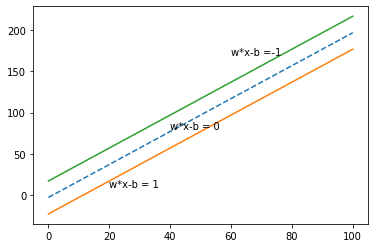

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


x = np.linspace(0,100,10)
y = 2*x -3
y1= y - 20 
y2= y + 20 

plt.plot(x,y, '--')
plt.plot(x,y1)
plt.plot(x,y2)


plt.text(60,170, 'w*x-b =-1')
plt.text(40,80,  'w*x-b = 0')
plt.text(20,10,  'w*x-b = 1')
plt.show()



In [2]:
class SVM():

    def __init__(self, epochs =10000, lr =0.001, Lambda=0.01):

        self.Lambda = Lambda
        self.epochs = epochs
        self.lr = lr 

        self.w = None
        self.b = None

    def fit(self, x, y):

        _, n_features = x.shape

        # Intilize w and b
        self.w = np.zeros((1,n_features))
        self.b = 0

        y = np.where(y<=0, -1 ,1)

        for epoch in range(self.epochs):
            for idx,values in enumerate(x):

                # linear model
                z = np.dot(values, self.w.T) + self.b
                

                # Condition
                constrain = y[idx]*z >=1
                

                values = values.reshape((n_features,1))
                y[idx] = y[idx].reshape((1,1))
                 

                # check Condition
                if constrain:
                    dw = self.Lambda*self.w
                    db = 0
                else:
                    dw = self.Lambda*self.w - np.dot(values, y[idx])
                    db = -y[idx]  

                # Gradient Descent
                self.w = self.w - self.lr*dw
                self.b = self.b - self.lr*db

            if epoch %1000 ==0:
                print(f'Epoch {epoch}')



    def predict(self, x, y):
        y_pred = np.dot(x,self.w.T) + self.b
        y_pred = np.sign(y_pred)  
        y_pred = np.where(y_pred ==-1,0,1)    
        return (y==y_pred).mean()

        


In [3]:
df = pd.read_csv('data/ion.csv')
df.drop(columns = ['Unnamed: 0', 'V1', 'V2'], inplace = True)
df.Class = np.where(df.Class == 'good', 1,0)


from sklearn.model_selection import train_test_split
X = df.drop(columns=['Class']).values
y = df.Class.values


# let's apply pca since we have large number of features vector
from sklearn.decomposition import  PCA
pca = PCA(n_components=10)
X = pca.fit_transform(X)


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train.reshape((y_train.shape[0], 1))
y_test  = y_test.reshape((y_test.shape[0], 1))



In [4]:
svm = SVM()
svm.fit(x_train,y_train)

Epoch 0
Epoch 1000
Epoch 2000
Epoch 3000
Epoch 4000
Epoch 5000
Epoch 6000
Epoch 7000
Epoch 8000
Epoch 9000


In [5]:
svm.predict(x_test,y_test)

0.8591549295774648